In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objs as go
import seaborn as sns

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import fim
from collections import Counter
from itertools import combinations
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display_html

# Web Interaction and Display
from IPython.display import Image, display, HTML

HTML(
    """
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
"""
)

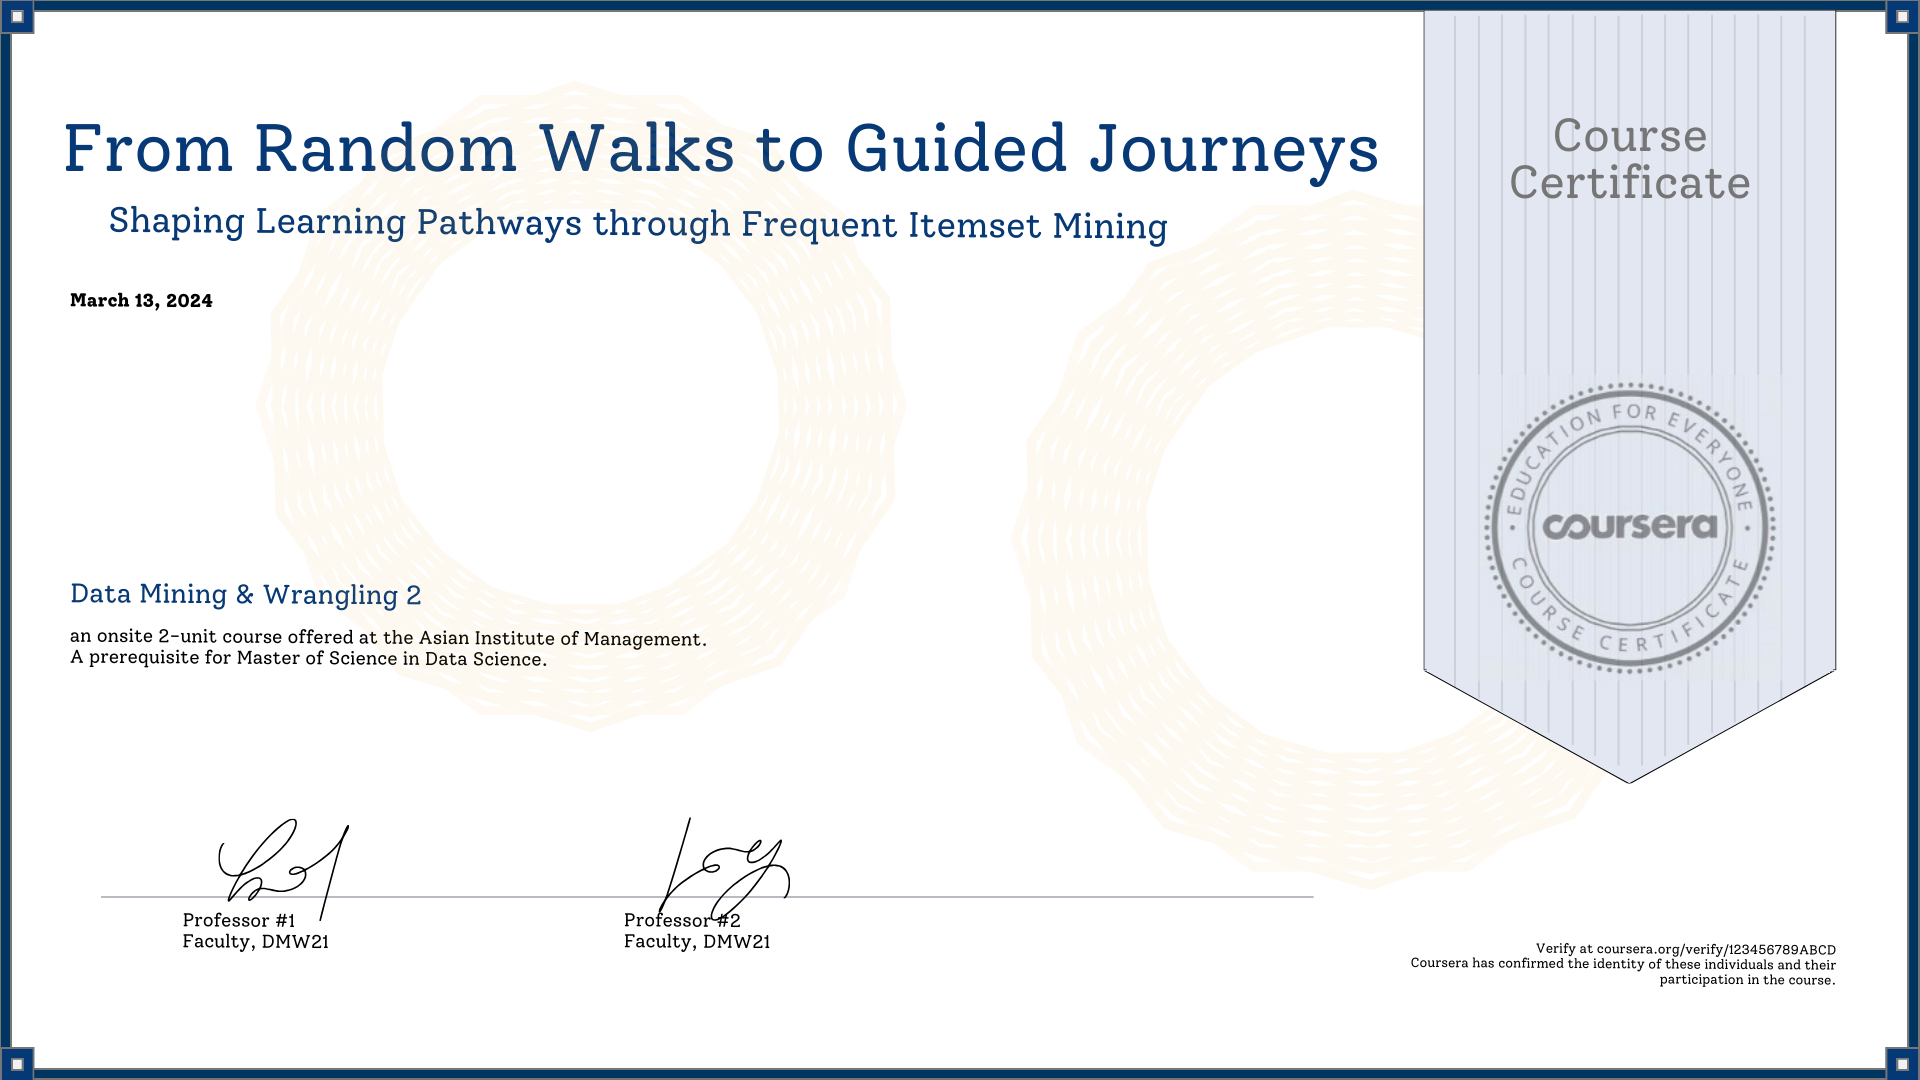

<div style="background-color:#0056D2; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">ABSTRACT</h1></center>
</div>

This study aims to assist online education systems in understanding user needs and preferences by leveraging frequent itemset mining and association rule mining techniques. The overarching goal is to demonstrate how these data mining algorithms can create personalized learning pathways that align with the collective interests and goals of learners. The context highlights the rapid growth of the online education market and the increasing demand for structured skill-building pathways. The methodology involves data preprocessing, clustering courses into technical and non-technical categories, generating frequent itemsets and association rules, and providing course recommendations through these identified patterns. Utilizing a Coursera reviews dataset, the analysis revealed promising results, with the association rule recommendations outperforming random recommendations in an A/B testing process. To address the cold start problem for new users, the approach suggests offering beginner and intermediate-level course bundles. The study concludes by discussing the robustness of the integrated recommendation system and outlining future directions, including incorporating domain expertise for pathway creation and course segmentation. Potential organizational analysis for optimal skill development pacing is also proposed.

<div style="background-color:#0056D2; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">INTRODUCTION</h1></center>
</div>

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">Background</h2></center>
</div>

Technological advancements have been pushing education to the cutting edge. The integration of virtual reality technologies in medical courses (Pottle, 2019) and the utilization of interactive tools like virtual whiteboards in online classrooms (e.g., Zoom) exemplify this trend. Moreover, the aftermath of the COVID-19 pandemic has necessitated the extension of learning beyond the classroom setting.
<br>

Interestingly, even before the pandemic, the online education market was forecasted to reach $350 billion by 2025 according to Research and Markets (2019). This projection highlights the growing demand for online learning opportunities.
<br>

Various online learning platforms, such as Udemy, Coursera, and Udacity, have emerged to cater to the needs of millions of learners worldwide. Furthermore, prestigious universities, including Stanford ad Harvard, have embraced the concept of democratizing education by offering online courses spanning various disciplines, including computer science, engineering, mathematics, business, art, and personal development.
<br>

These developments underscore the significant demand for online learning opportunities. The rapid growth of the online education market and the diverse range of platform options available to cater to different groups of learners may be attributed to the rapidly changing world we live in.

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">Problem Statement</h1></center>
</div>

In Udemy’s 2020 funding round of $50 million, President Darren Shimkus said, “The biggest challenge is for learners is to figure out what skills are emerging, what they can do to compete best in the global market. We’re in a world that’s changing so quickly that skills that were valued just three or four years ago are no longer relevant. People are confused and don’t know what they should be learning,” (Lunden, 2020). 
<br>

Online education systems grapple with expanding content options that far outpace structured programs optimized for cohesive skill building. Learning should guide skill development, but today thousands of courses mostly leave individuals navigating alone. Without deliberate paths, many abandon degrees halfway, or compromise their goals. 
<br>

For some that do have learning paths, the current approach is based on a top-down method, wherein a higher level of authority, such as Coursera or any educational system, is the one selecting and designing courses based on their perception of what learners need or what they believe will be popular or marketable.  But this approach may not always fully consider the diverse interests of individual learners, or the evolving demands of the broader educational landscape.
<br>

To dissect a complex system, such as an educational system, it’s imperative to study data that accurately reflects its reality. 

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">Objectives</h2></center>
</div>

The primary objective of this project is to assist online education systems in understanding the needs and preferences of their users by harnessing relevant insights from their data. Specifically, it aims to demonstrate the capabilities of the frequent itemset and association rule mining algorithms in creating learning pathways that put prime importance to the collective interests and goals of the broader user base.

The materialization of this goal hinges on the accomplishment of the following:
1. **Analyze Learners’ Activity**. The objective is to uncover groups of courses that are commonly taken together by a large number of students (aka frequent itemsets). These are the proposed learning pathways.

2. **Identify Association Rules**. After identifying the frequent itemsets, the next objective is to find rules that predict the occurrence of an item based on the occurrences of other items. For example, there could be association rules such as {Course A, Course B} => {Course C}, which means users who enroll in Course A and Course B often also enroll in Course C afterward. Incorporating these rules into the creation of learning pathways can help us recommend related courses or suggest alternative pathways based on the observed patterns in course enrollments.

<div style="background-color:#0056D2; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">DATA SOURCES AND DESCRIPTION</h1></center>
</div>

The dataset used for this project was obtained from the public repository of Jojie. The algorithmic process for extracting this data is found in the separate notebook submitted along with this main report. The Coursera Reviews Dataset contains information about various users (referred to as `reviewers`) who have rated and provided reviews for courses or subjects (identified by `course_id`). Additionally, the dataset includes the date (`date_reviews`) when each course was rated.

Since the frequent itemset mining algorithm will be applied, the primary focus of this dataset is on the `reviewers` and `course_id` columns. Therefore, the `rating` column can be disregarded for the purposes of this analysis. It is important to note that this dataset is substantial, consisting of 1,454,711 rows.

In [170]:
df_reviews = pd.read_csv('Coursera_reviews.csv', parse_dates=['date_reviews'])
print(df_reviews.shape)
html = df_reviews.head(5).to_html()

centered_html = f'''
<div style="text-align: center;">
    <div style="display: inline-block; text-align: left;">
        {html}
    </div>
</div>
'''

display(HTML(centered_html))

(1454711, 5)


,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just two complete watches so I'm happy about that. As usual there were some questions on the final exam that were NO WHERE in the course, which is annoying but far better than many microsoft tests I have taken. Never found the suplimental material that the course references... but who cares... i passed!",By Robert S,2020-02-12,4,google-cbrs-cpi-training
1,would be a better experience if the video and screen shots would sho on the side of the text that the instructor is going thru so that user does not have to go all the way to beginning of text to be able to view any slides instructor is showing.,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training
2,Information was perfect! The program itself was a little annoying. I had to wait 30 to 45 minutes after watching the videos to to take the quiz. Other than that the information was perfect and passed the test with no issues!,By Jacob D,2020-04-08,4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do a double take but all in all not bad.,By Dale B,2020-02-24,4,google-cbrs-cpi-training
4,Excellent course and the training provided was very detailed and easy to follow.,By Sean G,2020-06-18,4,google-cbrs-cpi-training


<center><b>Table 1.</b> Dataset of Coursera Reviews</center>

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">Coursera Courses and Descriptions</h2></center>
</div>

To enhance the understanding of the `course_id` column in the `reviews` dataset, two additional datasets will be utilized: `Coursera Courses` and `Coursera Descriptions`. These were taken from [Kaggle](https://www.kaggle.com/datasets/khusheekapoor/coursera-courses-dataset-2021).

- The `Coursera Courses` dataset provides an overview of each course, including the course name ('name'), the institution ('institution') offering the course, and the course URL, which is the directory of that course on the Coursera website.

- On the other hand, the `Coursera Descriptions` dataset offers more detailed information about each course. In addition to the `Course Name`, `University`, and `Course URL`, this dataset includes the `Difficulty Level` of the course, the average `Course Rating`, and the `Skills` that learners can acquire after completing the course.

By incorporating these additional datasets, the analysis can be enriched with valuable context and metadata about the courses. Specifically, the `Difficulty Level` and `Skills` information from the `Coursera Descriptions` dataset can play a crucial role in the frequent itemset mining (FIM) and clustering processes, as outlined in the methodology section.

The integration of these datasets will enable a more comprehensive understanding of the course offerings, their characteristics, and the potential skills and knowledge that learners can gain. This additional context will enhance the accuracy and relevance of the FIM analysis, ultimately leading to the creation of more tailored and meaningful learning pathways aligned with the collective interests and goals of learners.

In [5]:
df_courses = pd.read_csv('coursera_courses.csv')
df_descriptions = pd.read_csv('coursera-descriptions.csv')

In [6]:
html = df_courses.head(5).to_html()
centered_html = f'''
<div style="text-align: center;">
    <div style="display: inline-block; text-align: left;">
        {html}
    </div>
</div>
'''

display(HTML(centered_html))

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-well-being,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-support-fundamentals,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer by Google,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi-training,google-cbrs-cpi-training


<center><b>Table 2.</b> Dataset of Coursera Courses</center>

In [7]:
df_descriptions.head(5)

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


<center><b>Table 3.</b> Dataset of Coursera Descriptions</center>

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">Test Dataset</h2></center>
</div>

A test dataset was collected by asking the MSDS 2024 students what courses they are willing to take in Coursera. This dataset would be used to validate the proposed process.

The dataset consists of three columns:
1. `user`: Refers to the user who had taken the courses
2. `course`: Refers to the specific courses that a user had taken
3. `label`: Refers to the label of a set of courses that a user had taken. `label 0` means all courses are technical. `label 1` means non-technical. 

The process for labeling the courses with 0 or 1 are discussed in further detail in the Methodology section.

In [222]:
df_test = pd.read_csv('test_set.csv')


html = df_test.head(5).to_html()
centered_html = f'''
<div style="text-align: center;">
    <div style="display: inline-block; text-align: left;">
        {html}
    </div>
</div>
'''

display(HTML(centered_html))

,user,course,label
0,jed,"{'datasciencemathskills', 'probabilistic-models-in-nlp', 'game-development', 'google-machine-learning'}",0
1,christian,"{'machine-learning-projects', 'python-programming-introduction', 'ux-design-fundamentals'}",0
2,alyannah,"{'supply-chain-logistics', 'six-sigma-organization-advanced', 'big-history', 'creative-problem-solving', 'social-psychology'}",1
3,yannah,"{'data-visualization-tableau', 'python', 'object-oriented-java', 'ux-design-fundamentals'}",0
4,enzo,"{'sql-data-science', 'data-visualization-tableau', 'python'}",0


<center><b> Table 4.</b> Shows the user and the course taken</center>

<div style="background-color:#0056D2; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">METHODOLOGY</h1></center>

The methodology pipeline consists of the following:
1. **Data Extraction and Preprocessing**
    - Extract the Coursera reviews dataset from Jojie. Kindly refer to the supplementary notebook containing the algorithmic process to accomplish this.
    - Merging the Coursera reviews dataset with the Coursera courses and descriptions datasets. Note that these datasets were acquired from [Kaggle](https://www.kaggle.com/datasets/khusheekapoor/coursera-courses-dataset-2021).
    - Dropping duplicates and rows with null values
    - Retaining users who have taken between 2 to 10 courses

2. **Exploratory Data Analysis (EDA)**
    - Analyzing the distribution of users based on the number of courses taken
    - Examining the distribution of courses taken by users

3. **Clustering**
    - Vectorizing the 'Skills' column using TF-IDF
    - Performing hierarchical clustering on the vectorized skills
    - Labeling courses as technical (label 0) or non-technical (label 1)

4. **Frequent Itemset Mining (FIM) and Association Rule Mining (ARM)**
    - Creating databases for transactions (courses taken by users) for both labels
    - Generating frequent itemsets using the ECLAT algorithm
    - Generating association rules based on the frequent itemsets

5. **Course Recommendations**
    - Identifying potential recommendations based on association rules
    - Generating recommendations by finding consequents of rules with antecedents in user's courses
    - Comparing recommendations with a random recommendation baseline

6. **Addressing Cold Start Problem**
    - Generating a dataset with only beginner-level ("conservant") courses
    - Creating databases and generating frequent itemsets for beginner courses
    - Recommending beginner-level course bundles to new users


<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h2 style="color: white; font-weight:bold">Data Preprocessing</h2></center>
</div>

As previously mentioned, our task requires us to combine specific columns from various datasets. In this section, our goal is to unify these distinct datasets using a common key that we've identified within the data. To successfully merge the review dataset with the Coursera course description dataset, we will undertake the following steps:

<div style="background-color:#767676; padding: 10px 0;">
    <center><h4 style="color: white; font-weight:bold">Step 1: Merging of review and coursera courses datasets</h4></center>
</div>

Since the `Review` and `Coursera Descriptions` datasets have no similar key, we have to merge the `review` datasets with the `coursera` dataset first so that thay have a similar column which is `course_id`. Once merged, the review dataset will now have a similar key with Coursera Descriptions.

In [8]:
df_rev_course = df_reviews.merge(df_courses, on='course_id', how='left')

In [9]:
df_rev_course.head(5)

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
3,A few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,Excellent course and the training provided was...,By Sean G,2020-06-18,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...


<center><b>Table 5.</b> Shows the merged Review and Courses datasets</center>

<div style="background-color:#767676; padding: 10px 0;">
    <center><h4 style="color: white; font-weight:bold">Step 2: Merging of review and coursera descriptions datasets</h4></center>
</div>

Now that we have a similar key (`name`) for both Review and Description dataset, we can now merge them but only take the `Difficulty Level` and `Skills` columns.

In [10]:
# Rename the column course name in description dataset
df_descriptions.rename(columns={'Course Name': 'name'}, inplace=True)

# transform the key into lower case 
df_descriptions['name'] = df_descriptions['name'].str.lower()
df_rev_course['name'] = df_rev_course['name'].str.lower()

# Choosing the columns to merge
df_desc = df_descriptions[['name', 'Difficulty Level', 'Skills']]

# Merge the dataset with the key
df_final = df_rev_course.merge(df_desc, on='name')
df_final.head(5)

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url,Difficulty Level,Skills
0,This course is virtually worthless. I couldn't...,By James R,2019-04-23,1,financial-markets-global,financial markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,Finance Planning Leadership and Management ...
1,This course was horrible! The Content was very...,By Sanam P,2017-10-22,1,financial-markets-global,financial markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,Finance Planning Leadership and Management ...
2,Terrible lecturer. Maybe he should retire. He ...,By Brendan F,2019-01-29,1,financial-markets-global,financial markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,Finance Planning Leadership and Management ...
3,This course was aweful! I feel like I didnt le...,By Eli,2017-09-18,1,financial-markets-global,financial markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,Finance Planning Leadership and Management ...
4,I was expecting more from the course. It is ve...,By Sebastian S,2020-01-05,1,financial-markets-global,financial markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,Finance Planning Leadership and Management ...


<center><b>Table 6.</b> Shows the merged Coursera Reviews and Descriptions datasets</center>

<div style="background-color:#767676; padding: 10px 0;">
    <center><h4 style="color: white; font-weight:bold">Step 3: Drop duplicates and rows with null values in columns reviewers and course_id</h4></center>
</div>

In this step, we will check and drop the rows with duplicates. A row is considered to have a duplicate if the `reviewers` and `course_id` are similar with the other rows. These rows should be removed since the assumption is that a course can only be taken by the `reviewer` once. Next, we need to drop all the rows with null values in the `course_id` column and rows with a user who has taken or reviewed one course only. These rows are not insightful in the process of finding items that can be paired, or even doing a recommendation via Association Rule Mining.

In [11]:
duplicates = df_final.duplicated(subset=['reviewers', 'course_id']) 

number_of_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {number_of_duplicates}")

Number of duplicate rows: 1160499


In [12]:
df_final = df_final.drop_duplicates(subset=['reviewers', 'course_id'], 
                                    keep='last')
df_final.dropna(subset='reviewers', inplace=True)

# dropping users that had taken 1 course only
users = df_final.groupby('reviewers')['reviewers'].count()
users = users[users > 1 ].index
df_final = df_final[df_final['reviewers'].isin(users)]

In [13]:
df_final.shape

(232320, 10)

Finally we are left with **232,320** rows of data

<div style="background-color:#0056D2; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">EXPLORATORY DATA ANALYSIS</h1></center>
</div>

Now that we have merged and drop duplicates and null values we may now perform an exploratory data analysis (EDA) to check the distribution of data and assess if there are additional changes needed for our dataset.

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h4 style="color: white; font-weight:bold">Checking the number course taken by the reviewers</h4></center>
</div>

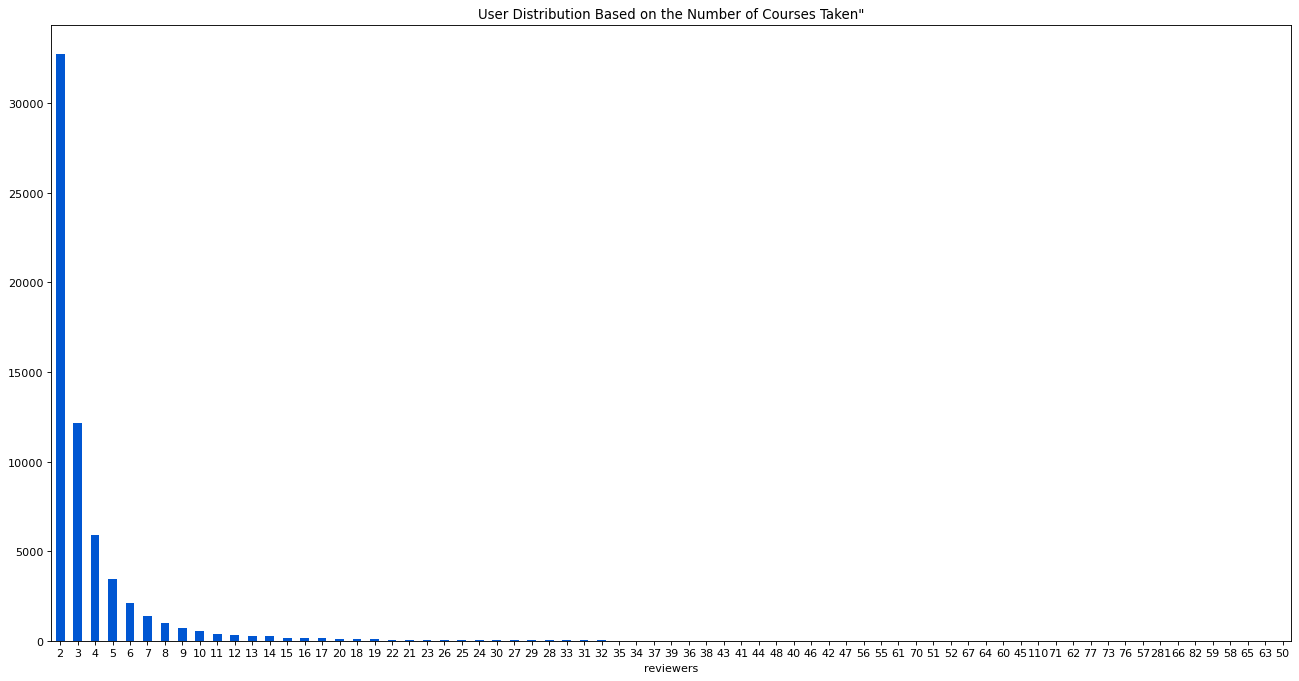

In [278]:
users = df_final.groupby('reviewers')['reviewers'].count()

plt.figure(figsize=(20, 10), dpi=80)
users.value_counts().plot(kind='bar', color='#0056D2') 
plt.title('User Distribution Based on the Number of Courses Taken"') 
plt.xticks(rotation=0)
plt.show()

<center><b>Figure 1.</b> Shows the distribution of users based on number of course taken </center>

Looking at the <b> Figure 1</b> we can see that more than 50% of the user/reviewer had only taken 2 courses. With this distribution we may be able to optimizely reduce the rows in our dataset.

In [17]:
user_2_10 = users[(users <= 10) & (users >= 2)].index
print(f'Number of users who had taken 2-10 courses: {len(user_2_10)}, '
      f'Percentage of users who had taken 2-10 courses:'
      f'{len(user_2_10) / len(users)* 100:.3}%')

Number of users who had taken 2-10 courses: 60050, Percentage of users who had taken 2-10 courses:95.8%


The result shows us that 95.8% of the data were users who had taken 2 to 10 courses, this means that the remaining 4.2% had taken 11 to 281 courses. With this result we will consider the 4.2% users as outliers since the number of course they had taken varies in great amount and most of the users became unique as the number of course taken get higher. Finally we are left with **185,288** rows

In [18]:
df_final_red = df_final[df_final['reviewers'].isin(user_2_10)]
df_final_red.shape

(185288, 10)

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h4 style="color: white; font-weight:bold">Checking the distribution course taken by the reviewers</h4></center>
</div>

In [19]:
course = df_final_red.groupby('course_id')['course_id'].count()

There are 463 unique course in the dataset


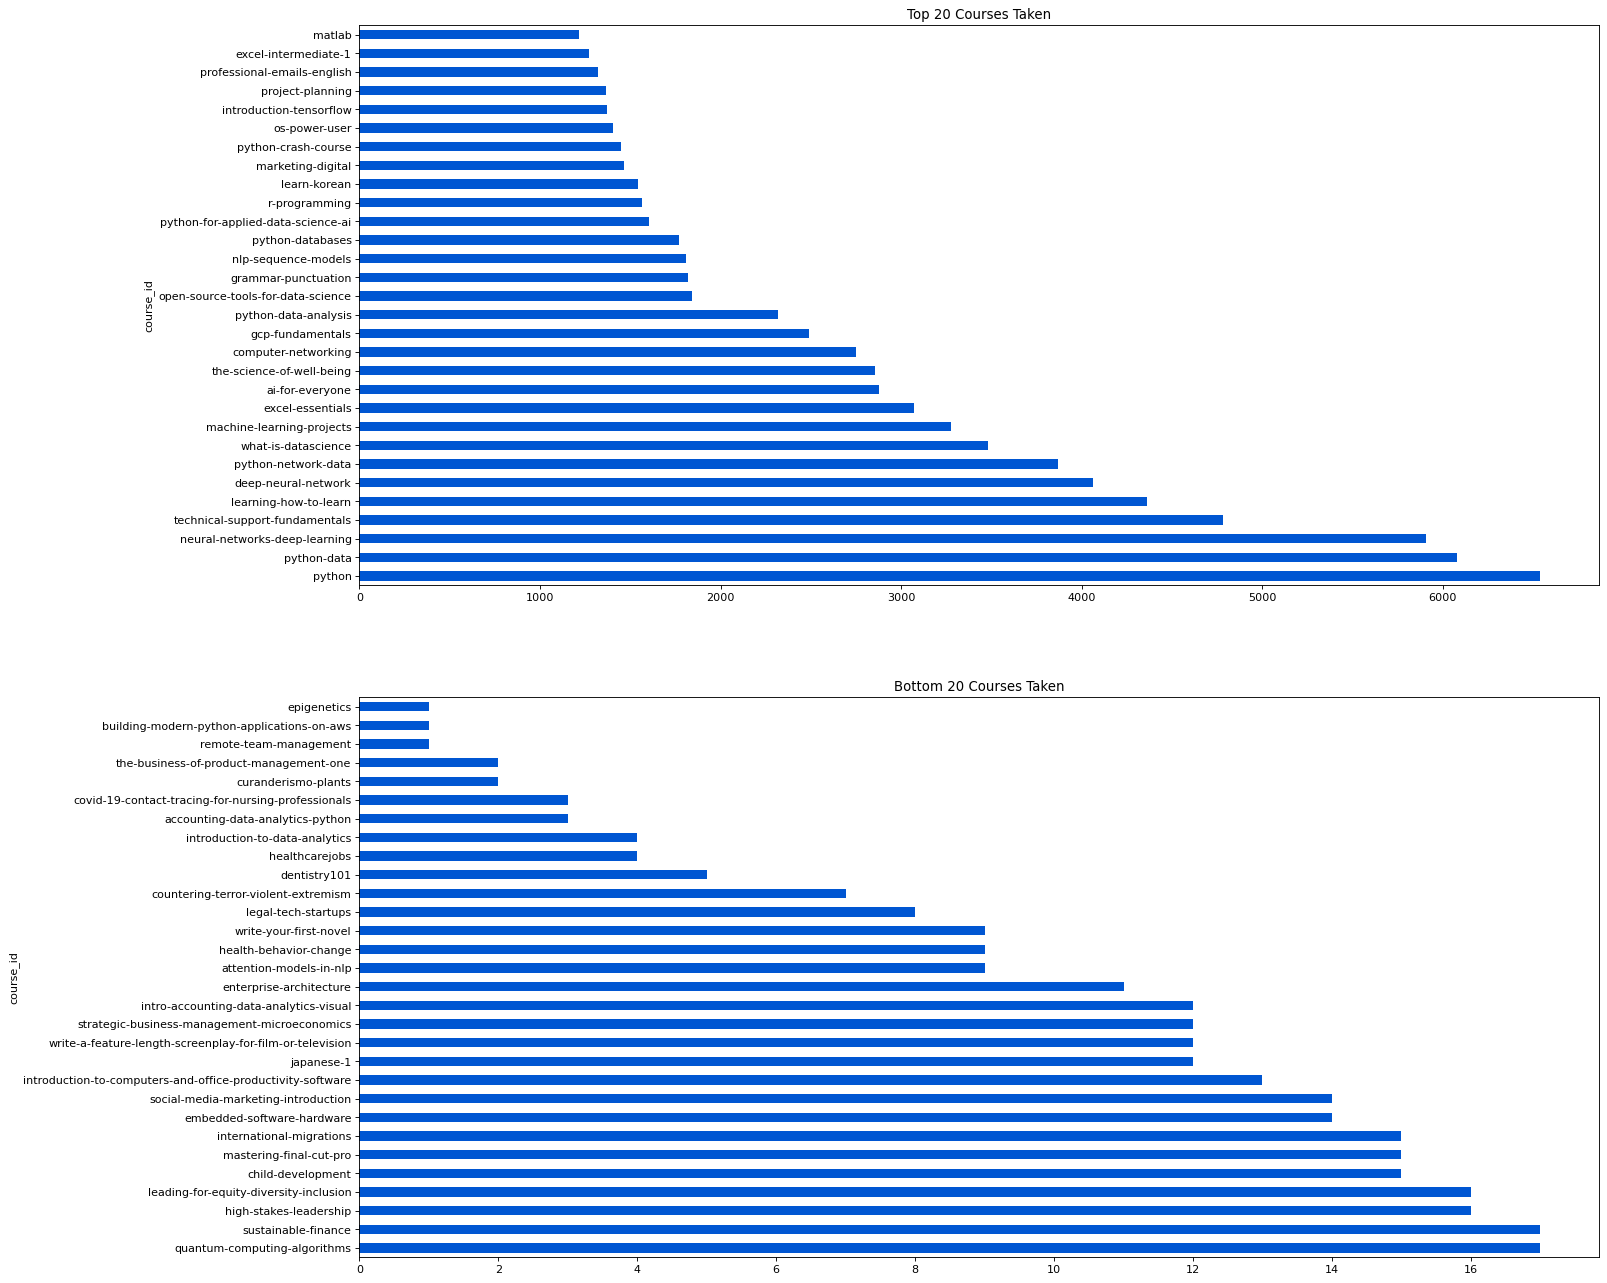

In [20]:
plt.figure(figsize=(20, 20), dpi=80)
print(f'There are {len(course)} unique course in the dataset')
sorted_courses = course.sort_values(ascending=False)

# Top 20 courses
plt.subplot(2, 1, 1) # 1 row, 2 columns, 1st subplot
sorted_courses.head(30).plot(kind='barh', color='#0056D2', ax=plt.gca())
plt.title('Top 20 Courses Taken')

# Bottom 20 courses
plt.subplot(2, 1, 2) # 1 row, 2 columns, 2nd subplot
sorted_courses.tail(30).plot(kind='barh', color='#0056D2', ax=plt.gca())
plt.title('Bottom 20 Courses Taken')

plt.show()

<center><b>Figure 2.</b> Shows the number of times a course was taken </center>

Looking at the value counts of the courses, we can see that on Figure 2, specifically the top 20 courses taken, majority of the of the courses are considered to be technical courses—these courses deals with computer or technology to be performed. Meanwhile, the bottom 20 courses taken refers more to non-technical courses. 

While there are some combinations of technical and non-technical courses in the figure (e.g., `grammar-panctuation` course in the top 20 and `building-modern-python-application-on-aws` in the bottom 20), we can infer that, in general, there are more technical courses than non-technical courses.

With these findings, if we directly apply FIM to this dataset, it is expected that most of the budnles would based on these technical courses, i.e., that the technical courses would overshadow the non-technical courses. This could lead to an outcome wherein no bundles would involving non-technical courses would be created. Naturally, this is not the ideal outcome. Taking a technical and/or non-technical course depends on the users' goals and interests, and if FIM cannot create a bundle that can cater the different needs of the user, then the final pathways created would be very limited and inconclusive.

<div style="background-color:#0056D2; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">CLUSTERING</h1></center>
</div>

Solving the underlying problem presented to us in the EDA, we opted to use clustering, specifically Hierarchical Clustering. The courses present in this study has a `Difficulty Level` column. This means that these courses follow a tree-like structure. 

For example, a course `python` is considered to be conservant, while the course `Python Programming Essential` is considered appropriate for a beginner level. Although both are using the Python language, this hierarchy needs to be followed before taking a course. The Hierarcichal Clustering method can capture this nuance.

To better understand and organize the courses within the dataset, the analysis will leverage the `Skills` column for clustering purposes. The `Skills` column represents the specific skills that a learner will acquire upon completing a particular course.

The rationale behind using the `Skills` column for clustering is based on the assumption that the skills listed for each course sufficiently reflect the core content and objectives of that course. In other words, the skills gained can be considered a concise representation or definition of the course itself.

The steps to perform Hierarchical Clustering are as follows:

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h4 style="color: white; font-weight:bold">Step 1: Vectorizing the Skills</h4></center>
</div>


Since the `Skills` are already present in our dataset, we could directly vectorize it. In this case, we will be using the Term Frequency-Inverse Document Frequency (TFIDF) method because the `Skills` themselves are unique for every course and because we want to give importance to that uniqueness.

In [21]:
df_skills = df_final_red[['course_id', 'Skills']].drop_duplicates(keep='last')

In [111]:
vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.9, lowercase=True,
                             token_pattern=r"(?u)\b[a-zA-Z']+\b")
x = vectorizer.fit_transform(df_skills['Skills'])

# Convert the result to a DataFrame
df_bow = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out(),
                      index=df_skills['course_id'])

In [112]:
model = TruncatedSVD(n_components=len(df_bow.columns))
model.fit(df_bow)
svd_course = model.fit_transform(df_bow)

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h4 style="color: white; font-weight:bold">Step 2: Perform Hierarchical Clustering and Generate its Dendrogram</h4></center>
</div>

In [113]:
def plot1(Z):
    """
    Generate a dendrogram plot from hierarchical clustering data.

    Parameters
    ----------
    Z : array_like
        The hierarchical clustering encoded as a linkage matrix.

    Returns
    -------
    Figure
        A matplotlib Figure object containing the dendrogram plot.
    """
    fig, ax = plt.subplots(figsize=(20, 10), dpi=80)
    dn = dendrogram(Z, truncate_mode='level', p=5, ax=ax)
    colors = ['#0056D2', '#162E75', '#003461']
    for i, d in enumerate(dn['dcoord']):
        color = colors[i % len(colors)]  # Cycle through your colors
        x = dn['icoord'][i]
        ax.plot(x, d, color=color)
    ax.set_ylabel(r"$\Delta$")
    plt.title('Condensed Dendrogram with at most 5 levels')
    plt.tight_layout()
    return fig

In [114]:
def dendro_plot():
    """
    Generate a dendrogram plot of clustered data.

    Returns
    -------
    Figure
        A matplotlib Figure object containing the dendrogram plot.

    """
    Z = linkage(df_bow, method='ward', optimal_ordering=True)
    fig, ax = plt.subplots(figsize=(20, 10), dpi=80)
    dn = dendrogram(Z, ax=ax)
    colors = ['#0056D2', '#162E75', '#003461']
    for i, d in enumerate(dn['dcoord']):
        color = colors[i % len(colors)]  # Cycle through your colors
        x = dn['icoord'][i]
        ax.plot(x, d, color=color)
    ax.set_ylabel(r"$h$")
    plt.tight_layout()
    plt.title('Original Dendrogram')
    return fig

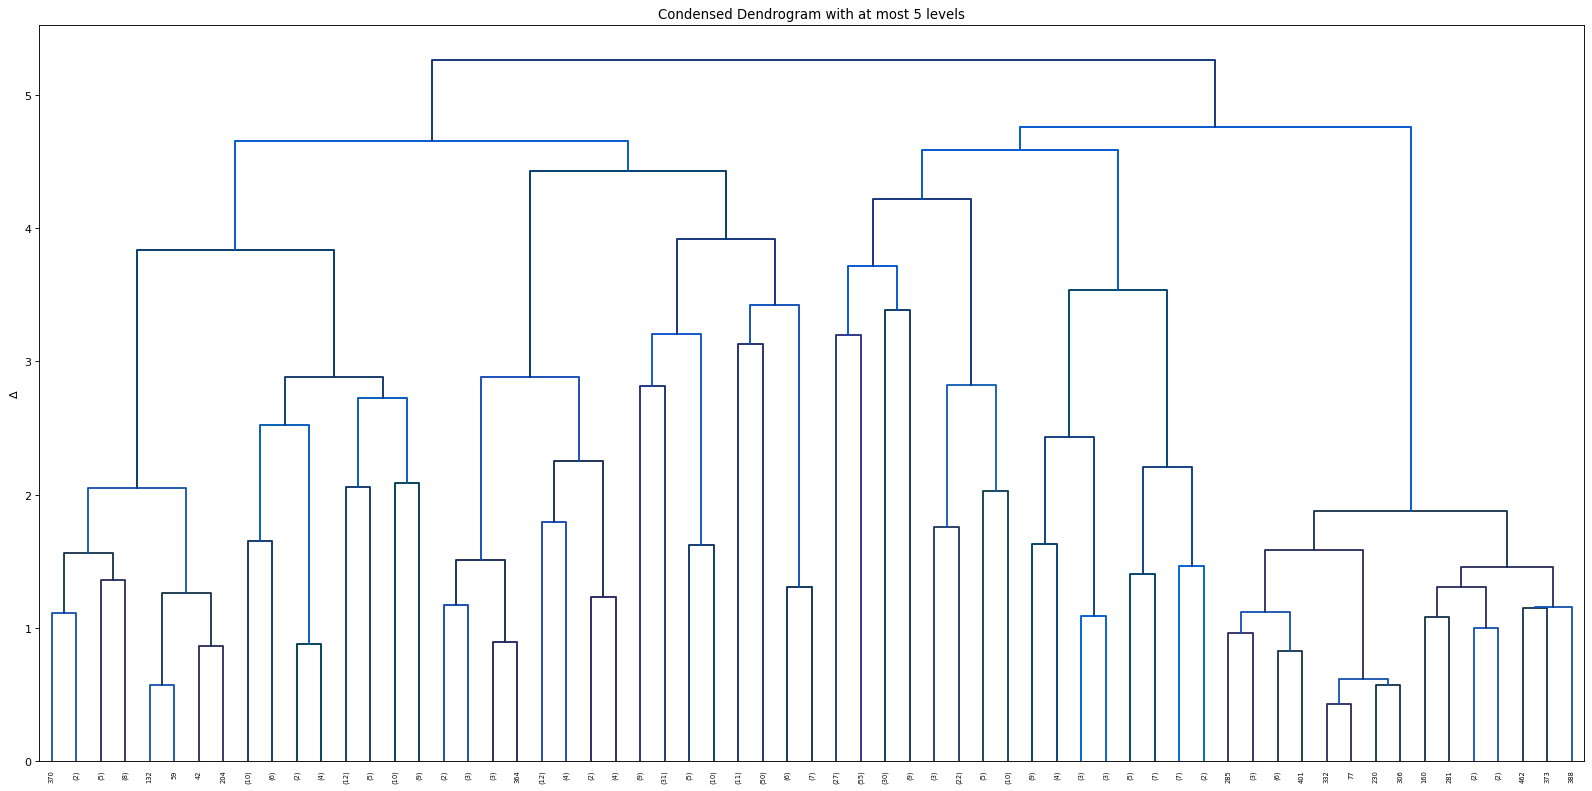

In [115]:
Z = linkage(svd_course, method='ward', optimal_ordering=True)
dendrogram_levelled = plot1(Z);

<center><b>Figure 3.</b> Condensed Dendrogram of Hierarchical Clustering on Skills</center>

As expected, we can clearly see in Figure 3 that there really are two main clusters that encapsulate all the courses. These two clusters distinctly categorize the courses into what we anticipated: technical and non-technical. 

Given Figure 3, let us find out which courses belongs to that cluster.

In [116]:
agg = AgglomerativeClustering(n_clusters=2, linkage="ward")
y_predict_skills = agg.fit_predict(svd_course)
df_skills['label'] = y_predict_skills

In [279]:
df_skills_0 = (df_skills[df_skills['label'] == 0]['course_id']
               .head(5).to_frame()).reset_index(drop=True)
df_skills_0 = df_skills_0.rename(columns={'course_id': 'Label 0'})

df_skills_1 = (df_skills[df_skills['label'] == 1]['course_id']
               .head(5).to_frame()).reset_index(drop=True)
df_skills_1 = df_skills_1.rename(columns={'course_id': 'Label 1'})

# Function to display dataframes side by side


def display_side_by_side(*args):
    """
    Display multiple pandas DataFrames side by side in Jupyter Notebook.
    
    Parameters
    ----------
    *args : DataFrame
        Variable number of pandas DataFrame objects to be displayed
        side by side.

    Note
    ----
    This function is intended for use within Jupyter Notebook or other 
    IPython environments that support HTML display.

    """
    html_str = ''
    for df in args:
        html_str += df.to_html().replace('class="dataframe"',
                                         f'class="dataframe" style="display:'
                                         f'inline;margin-right:10px;"')

    # Centering the dataframes in the HTML output
    html_str = f'<div style="text-align:center;">{html_str}</div>'
    display_html(html_str, raw=True)


# Call the function to display dataframes side by side
print(df_skills['label'].value_counts())
display_side_by_side(df_skills_0, df_skills_1)

label
1    238
0    225
Name: count, dtype: int64


,Label 0
0,ai-for-everyone
1,python-crash-course
2,neural-networks-deep-learning
3,what-is-datascience
4,html-css-javascript-for-web-developers
,Label 1
0,psychological-first-aid
1,negotiation-skills
2,uva-darden-project-management
3,brand


<center><b>Table 7.</b> Shows the courses under the label 0 and 1 </center>

As expected, courses in Label 0 suggests that they are the technical courses since most of them are related to science and programming, while Label 1 represents the non-technical courses that have little relations to science and/or programming. Moreover, the distribution of the courses are almost balance between the two clusters.

Now we can determine the categories of a courses that a user had taken.

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h4 style="color: white; font-weight:bold">Step 3: Labeling the course taken by the user</h4></center>
</div>

<h5 style="color: #767676; font-weight:bold"> Get the course per label</h5>

In [118]:
label_0 = list(df_skills[df_skills['label'] == 0]['course_id'])
label_1 = list(df_skills[df_skills['label'] == 1]['course_id'])

<h5 style="color: #767676; font-weight:bold"> Assign the label value per course taken by the user</h5>

In [280]:
pd.options.mode.chained_assignment = None  
def label_course(row):
    """
    Label a course row based on its course ID.

    Parameters
    ----------
    row : Series
        A pandas Series representing a row from a DataFrame, expected to
        contain the 'course_id' field.

    Returns
    -------
    int
        Returns 0 if 'course_id' is in 'label_0', 1 if it's in 'label_1',
        and -1 (or another default value) otherwise.

    """
    if row['course_id'] in label_0:
        return 0
    elif row['course_id'] in label_1:
        return 1
    else:
        return -1  # Or some other default value

    
df_final_red['label'] = df_final_red.apply(label_course, axis=1)
print(f'{df_final_red["label"].value_counts()}')
df_final_red.head(5)

label
0    130112
1     55176
Name: count, dtype: int64


,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url,Difficulty Level,Skills,label
53,This course was aweful! I feel like I didnt le...,By Eli,2017-09-18,1,financial-markets-global,financial markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,Finance Planning Leadership and Management ...,1
55,It was not very interesting. The course needs ...,By Aniket G,2019-05-19,1,financial-markets-global,financial markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,Finance Planning Leadership and Management ...,1
60,Don't waste your time! It's unstructured pile ...,By Sergey F,2020-05-02,1,financial-markets-global,financial markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,Finance Planning Leadership and Management ...,1
62,As it was highlighted as free course with cert...,By K,2020-04-13,1,financial-markets-global,financial markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,Finance Planning Leadership and Management ...,1
67,It was very useful course. This course is very...,By Haritha S,2020-04-18,1,financial-markets-global,financial markets,Yale University,https://www.coursera.org/learn/financial-marke...,Intermediate,Finance Planning Leadership and Management ...,1


<center><b>Table 8.</b> shows the label of the course taken by the user</center>

Table 8 shows that majority of the users indeed took technical courses. The number of technical courses taken represents 70.22% of the data. Looking back at the result we got at <b> Table 5</b>, although there are more non-technical courses, there are more user who had taken technical courses.

<div style="background-color:#0056D2; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">FREQUENT ITEMSET AND ASSOCIATION RULE MINING</h1></center>
</div>

Now that we have addressed the necessary data cleaning and preprocessing, we can now apply the Frequent Itemset Mining (FIM) and Association Rule Mining (ARM) techniques.

The first step in implementing FIM is to list down all transactions that had been done. In our case the Final Reviews Dataset would be considered as the transaction. The transaction represents all the courses taken by a user.

Implementing FIM follows these steps:

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h4 style="color: white; font-weight:bold">Step 1: Create a database for the Transactions</h4></center>
</div>

Since we wanted to create have two kinds of FIM, we will have to create two databases based on the two labels we have (technical and non-technical).

In [281]:
def create_db_pivot(df):
    """
    Create separate pivot tables and databases for two groups of data based on labels.

    Parameters
    ----------
    df : DataFrame
        A pandas DataFrame containing the columns 'reviewers', 'course_id',
        'rating', and 'label'. 

    Returns
    -------
    tuple
        A tuple containing four elements: two lists of sets (db_0 and db_1)
        where each set contains course IDs reviewed by a single user in
        groups 0 and 1, respectively, and two pivot tables
        (df_users_0 and df_users_1) corresponding to the users' ratings for
        each course in each group.

    """
    df_0 = df[df['label'] == 0]
    df_1 = df[df['label'] == 1]

    df_users_0 = df_0.pivot_table(index='reviewers', columns='course_id',
                                  values='rating')

    df_users_1 = df_1.pivot_table(index='reviewers', columns='course_id',
                                  values='rating')

    grouped_0 = df_0.groupby('reviewers')['course_id'].apply(set)
    db_0 = list(grouped_0)

    grouped_1 = df_1.groupby('reviewers')['course_id'].apply(set)
    db_1 = list(grouped_1)

    return db_0, db_1, df_users_0, df_users_1

In [275]:
db_0, db_1, df_users_0, df_users_1 = create_db_pivot(df_final_red)

In [148]:
series_1 = db_0[:5]
series_2 = db_1[:5]

series_1 = pd.Series(series_1, name='Label 0')
series_2 = pd.Series(series_2, name='Label 1')

# Convert Series to DataFrame
df_series_1 = series_1.to_frame()
df_series_2 = series_2.to_frame()

# Display side by side
print(f'Database for labael 0: {len(db_0)},'
      f'Database for labael 1: {len(db_1)}')
display_side_by_side(df_series_1, df_series_2)

Database for labael 0: 51978,Database for labael 1: 30948


,Label 0
0,"{machine-learning-projects, deep-neural-network}"
1,"{datasciencemathskills, python}"
2,"{bayesian-statistics, how-things-work}"
3,{python}
4,{excel-essentials}
,Label 1
0,"{project-planning, marketing-digital}"
1,{global-financial-crisis}
2,{industrial-biotech}
3,{everyday-chinese-medicine}


<center><b>Table 9.</b> Shows the database created per label</center>

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h4 style="color: white; font-weight:bold">Step 2: Generate FIM and ARM</h4></center>
</div>

After creating our database for both the technical and non-technical courses, we can now generate our Frequent Itemset and Association Rules. 

In this case the algorithm used was ECLAT (Equivalence Class Transformation). The use of ECLAT was not without reason.
1. ECLAT and FPGrowth are considered the best FIM algorithms, and since the dataset used was not large enough, ECLAT should suffice.
2. In this case, memory is not yet a problem.
3. ECLAT requires more simple implementation compared to FPGrowth, which is more complex.

For the minimum support, the reason it was an absolute number and a bit on the low end is because of the nature of the data—since we have 463 courses (items) and most transactions are between 2 and 10 only, and most users only had 2 transactions. 

The number of transactions that we have for database 0 and 1 is 51,978 and 30,948, respectively. Because of the sparsity of our dataset, we have decided to use a low minimum support and minimum confidence. This is also because we want the length of both rules to be almost equal.

In [276]:
FI_0 = fim.eclat(db_0, supp=-7, report='a', zmin=1)
FI_1 = fim.eclat(db_1, supp=-2, report='a', zmin=1)

In [277]:
series_1 = FI_0[:10]
series_2 = FI_1[:10]

series_1 = pd.Series(series_1, name='Label 0')
series_2 = pd.Series(series_2, name='Label 1')

# Convert Series to DataFrame
df_series_1 = series_1.to_frame()
df_series_2 = series_2.to_frame()

# Display side by side
print(f'Database for labael 0: {len(FI_0)},'
      f'Database for labael 1: {len(FI_1)}')
display_side_by_side(df_series_1, df_series_2)

Database for labael 0: 7973,Database for labael 1: 7788


,Label 0
0,"((python,), 6540)"
1,"((python-data, python), 2256)"
2,"((python-data,), 6077)"
3,"((neural-networks-deep-learning, python), 545)"
4,"((neural-networks-deep-learning, python-data, python), 157)"
5,"((neural-networks-deep-learning, python-data), 471)"
6,"((neural-networks-deep-learning,), 5908)"
7,"((technical-support-fundamentals, python), 442)"
8,"((technical-support-fundamentals, python-data, python), 103)"
9,"((technical-support-fundamentals, python-data), 323)"


<center><b>Table 10.</b> Possible bundles and its corresponding support<center>

To generate the Association Rules, we would follow the established parameters and models that we used in generating the Frequent Itemsets. Given that our dataset is sparse and majority of the users had taken 2 courses only, we will lower our minimum confidence to 20%, since we want to give emphasis to the consequent that is a one-itemset only. 

We'll be utilizing the `lift` metric in our analysis, as it helps us understand the relationship between two itemsets in our data. Specifically, lift measures how much more likely one itemset (the consequent) is to appear in a transaction when another itemset (the antecedent) is already present. For our purposes, we're looking for a lift value greater than 1, indicating that the presence of the antecedent significantly increases the likelihood of the consequent appearing in the same transaction.

In [201]:
rules_0 = fim.eclat(db_0, target='r', supp=-8, conf=20, report='l', zmin=1)
rules_1 = fim.eclat(db_1, target='r', supp=-2, conf=20, report='l', zmin=1)

In [202]:
series_1 = rules_0[:10]
series_2 = rules_1[:10]

series_1 = pd.Series(series_1, name='Label 0')
series_2 = pd.Series(series_2, name='Label 1')

# Convert Series to DataFrame
df_series_1 = series_1.to_frame()
df_series_2 = series_2.to_frame()

# Display side by side
print(f'Database for labael 0: {len(rules_0)},'
      f'Database for labael 1: {len(rules_1)}')
display_side_by_side(df_series_1, df_series_2)

Database for labael 0: 24508,Database for labael 1: 33255


,Label 0
0,"(python, (python-data,), 2.950473208503109)"
1,"(python-data, (python,), 2.950473208503109)"
2,"(python, (neural-networks-deep-learning, python-data), 2.649235474006116)"
3,"(python-data, (neural-networks-deep-learning, python), 2.4639590092286605)"
4,"(python, (technical-support-fundamentals, python-data), 2.5344079302411453)"
5,"(python-data, (technical-support-fundamentals, python), 1.9931743231842933)"
6,"(python, (technical-support-fundamentals, neural-networks-deep-learning, python-data), 3.272584997301673)"
7,"(python-data, (technical-support-fundamentals, neural-networks-deep-learning, python), 2.721483387436983)"
8,"(python, (deep-neural-network, python-data), 2.5958234684817993)"
9,"(python-data, (deep-neural-network, python), 2.4139787936349943)"


<center><b>Table 11.</b> Shows the different Assoication Rule per label<center>

Table 11 presents various Association Rules based on the parameters we've set. Each row in the table represents a distinct Association Rule, formatted as a tuple with three elements:

1. **Consequent**: The first element of each tuple. This represents an itemset that is likely to be found in combination with the antecedent (the second element).
2. **Antecedent**: The second element of the tuple. It's the itemset whose presence in a transaction suggests the likelihood of the consequent also appearing.
3. **Lift**: The third element in the tuple. Lift is a metric that quantifies how much more likely it is for the consequent to appear in a transaction when the antecedent is present. A higher lift value indicates a stronger association between the two itemsets.

With our Frequent Itemset Mining and Association Rule Mining completed, we are now equipped to proceed with generating recommendations.

<div style="background-color:#0056D2; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">COURSE RECOMMENDATIONS</h1></center>
</div>

In this section, we'll be utilizing `df_test`, a dataset manually collected through the students of MSDS 2024, for our course recommendation process. The recommendations will be based on the association rules we've previously generated. Here's how it will work:

1. **Identifying Potential Recommendations**: For each course a user has taken in df_test, we'll consider these courses as a **superset of antecedent**. We'll then examine all available association rules to see if the antecedent of an association rule is a subset of this superset.

2. **Generating Recommendations**: If the antecedent of an association rule is found within the user's courses (the superset), we'll add the corresponding consequent to that user's list of recommendations.

3. **Avoiding Repetition in Recommendations**: To ensure that our recommendations are unique and relevant, we'll convert the list of consequents into a set and subtract any courses the user has already taken. This subtraction step is crucial to ensure that we don't recommend a course the user has completed.

4. **Random Recommendation for Baseline Comparison**: As a baseline, we'll also generate a set of random course recommendations. The number of courses in this random recommendation will match the number of courses suggested by our Association Rule Mining (ARM) recommendations. This allows us to compare the effectiveness of our ARM-based recommendations against a random baseline.

In [283]:
df_testset = pd.read_csv('test_set.csv')

In [284]:
import ast
def get_recos(row, string):
    """
    Generate recommendations for a user either based on association rules or
    randomly.

    Parameters
    ----------
    row : Series
        A pandas Series representing a user's row from a DataFrame, expected
        to contain 'label' and 'course' fields.
    string : str
        A string specifying the type of recommendation to generate: 'recos' for 
        recommendations based on association rules, or 'random' for
        random recommendations.

    Returns
    -------
    set
        A set of recommended course IDs.

    """
    recommend = []
    if string == 'recos':
        if row['label'] == 0:
            for rule in rules_0:
                rule_set = set(rule[1])

                if rule_set.issubset(row['course']):
                    recommend.append(rule[0])
        elif row['label'] == 1:
            for rule in rules_1:
                rule_set = set(rule[1])

                if rule_set.issubset(row['course']):
                    recommend.append(rule[0])
        recommendation = set(recommend)
        recos = recommendation - set(row['course'])
        
        return set(recos)
        
    elif string == 'random':
        if row['label'] == 0:
            courses = list(set(df_users_0.columns))
            num_recos = len(row['recos'])
            random_recos = random.sample(courses, min(len(courses), num_recos))
            
        elif row['label'] == 1:
            courses = list(set(df_users_1.columns))
            num_recos = len(row['recos'])
            random_recos = random.sample(courses, min(len(courses), num_recos))
        return set(random_recos)
            
    
df_testset['course'] = df_testset['course'].apply(ast.literal_eval)
df_testset['recos'] = df_testset.apply(get_recos,args=('recos',), axis=1)
df_testset['random_recos'] = df_testset.apply(get_recos,args=('random',), axis=1)

In [255]:
html = df_testset.head(5).to_html()
centered_html = f'''
<div style="text-align: center;">
    <div style="display: inline-block; text-align: left;">
        {html}
    </div>
</div>
'''

display(HTML(centered_html))

,user,course,label,recos,random_recos
0,jed,"{datasciencemathskills, game-development, google-machine-learning, probabilistic-models-in-nlp}",0,"{python-databases, deep-neural-network, matlab, sequence-models-in-nlp, excel-essentials, python-data, neural-networks-deep-learning, classification-vector-spaces-in-nlp}","{grammar-punctuation, introduction-to-data-analytics, practical-time-series-analysis, foundations-big-data-analysis-sql, neural-networks-deep-learning, introduction-tensorflow, basic-statistics, uva-darden-continous-delivery-devops}"
1,christian,"{ux-design-fundamentals, machine-learning-projects, python-programming-introduction}",0,"{nlp-sequence-models, neural-networks-deep-learning, visual-elements-user-interface-design, deep-neural-network}","{intro-accounting-data-analytics-visual, big-data-essentials, gis, duke-programming-web}"
2,alyannah,"{creative-problem-solving, big-history, six-sigma-organization-advanced, supply-chain-logistics, social-psychology}",1,"{psychological-first-aid, mindshift, ecology-conservation, content-marketing, communication-strategies-virtual-age, introduction-genomics, epidemiology, corporate-finance-essentials, company-future-management, marketing-digital}","{the-science-of-well-being, anatomy403-1x, project-risk-management, community-organizing, uva-darden-managerial-accounting, gender-sexuality, global-financial-crisis, corporate-finance-essentials, dino101, european-law-fundamentals}"
3,yannah,"{ux-design-fundamentals, python, data-visualization-tableau, object-oriented-java}",0,"{python-network-data, python-data, visual-elements-user-interface-design, ai-for-everyone}","{summary-statistics, pca-machine-learning, tensorflow-sequences-time-series-and-prediction, open-source-tools-for-data-science}"
4,enzo,"{sql-data-science, python, data-visualization-tableau}",0,"{python-for-data-visualization, data-analysis-with-python, open-source-tools-for-data-science, what-is-datascience, python-data, python-for-applied-data-science-ai, data-science-methodology}","{system-administration-it-infrastructure-services, engineering-mechanics-statics, introduction-to-ai, python-functions-files-dictionaries, accounting-data-analytics-python, introduction-to-calculus, big-data-essentials}"


<center><b>Table 12.</b> Shows the df_testset together with ARM Recommendation and Random Recommendation</center>

Table 12 provides an overview of the different course recommendations generated by two methods: Association Rules and Random Recommendation. By analyzing these results, we aim to evaluate the effectiveness of our Recommendation System.

To quantitatively assess our system's performance, we have employed the **A|B Testing Method**. This involves presenting both sets of recommendations (from Association Rules and Random Recommendation) to each specific user without revealing which set is which. This approach is taken to prevent any biases that might arise if the users knew the source of the recommendations.

Our initial findings before the A|B Testing Method are as follows:

In [253]:
results = pd.DataFrame()
results['user'] = df_testset['user']
results['course'] = df_testset['course'].apply(len)
results['recos'] = df_testset['recos'].apply(len)
results['random_recos'] = df_testset['random_recos'].apply(len)

In [257]:
html = results.to_html()
centered_html = f'''
<div style="text-align: center;">
    <div style="display: inline-block; text-align: left;">
        {html}
    </div>
</div>
'''

display(HTML(centered_html))

,user,course,recos,random_recos
0,jed,4,8,8
1,christian,3,4,4
2,alyannah,5,10,10
3,yannah,4,4,4
4,enzo,3,7,7
5,bryan,4,7,7
6,anish,4,13,13
7,warren,6,20,20
8,ana_1,3,3,3
9,ana_0,1,2,2


<center><b>Table 13.</b> Shows the number of course taken, recommendation, and random recommendation to a user</center>

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h4 style="color: white; font-weight:bold">A|B Testing</h4></center>
</div>

After performing A|B Testing with the MSDS 2024 Students, we got the following results:

<table border="1">
  <tr>
    <th>User</th>
    <th>Accepted Recos</th>
    <th>Accepted Random Recos</th>
  </tr>
  <tr>
    <td>Jed</td>
    <td>5/8</td>
    <td>0/8</td>
  </tr>
  <tr>
    <td>Christian</td>
    <td>3/4</td>
    <td>1/4</td>
  </tr>
  <tr>
    <td>Alyannah</td>
    <td>7/10</td>
    <td>3/10</td>
  </tr>
  <tr>
    <td>Yannah</td>
    <td>4/4</td>
    <td>4/4</td>
  </tr>
  <tr>
    <td>Enzo</td>
    <td>4/7</td>
    <td>1/7</td>
  </tr>
  <tr>
    <td>Bryan</td>
    <td>4/7</td>
    <td>1/7</td>
  </tr>
  <tr>
    <td>Anish</td>
    <td>7/13</td>
    <td>2/13</td>
  </tr>
  <tr>
    <td>Warren</td>
    <td>20/20</td>
    <td>19/20</td>
  </tr>
  <tr>
    <td>Ana_1</td>
    <td>3/3</td>
    <td>0/3</td>
  </tr>
  <tr>
    <td>Ana_0</td>
    <td>2/2</td>
    <td>0/2</td>
  </tr>
  <tr>
    <td>Greg</td>
    <td>8/11</td>
    <td>3/11</td>
  </tr>
</table>


<center><b>Table 14.</b> Shows the number of accepted course per association rule recommendation and random recommendation</center>

Table 14 reveals that the majority of recommendations made using the Association Rule method were accepted by users. In contrast, the responses to the random recommendations varied significantly, ranging from some users not accepting any to others accepting almost all of them. These observations have led us to the following results:

<table border="1">
  <tr>
    <th></th>
    <th> Mean Accepted Recos</th>
    <th>Mean Accepted Random Recos</th>
  </tr>
  <tr>
    <td>Mean</td>
    <td>77.12%</td>
    <td>28.38%</td>
  </tr>
  <tr>

<center><b>Table 15.</b> shows the average likelyhood that the recommended course will be taken</center>

<div style="background-color:#0056D2; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">BUT WHAT IF YOU ARE A NEW USER?</h1></center>
</div>

Because FIM and ARM have limitations, if a user doesn't have any historical transactions, we won't be able to provide recommendations. Therefore, our solution is to recommend bundles that have a difficulty level of Conversant.

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h4 style="color: white; font-weight:bold">Step 1: Generate the needed datasetStep 1: Generate the needed dataset</h4></center>
</div>

This dataset only includes a "Difficulty Level" of "Conservant," which indicates the initial course suitable for new users.

In [264]:
df_conservant = df_final_red[df_final_red['Difficulty Level'] == 'Conversant']

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h4 style="color: white; font-weight:bold">Step 2: Generate the database for both label</h4></center>
</div>

In [266]:
db_0, db_1, df_users_0, df_users_1 = create_db_pivot(df_conservant)

<div style="background-color:#EFB637; padding: 10px 0;">
    <center><h4 style="color: white; font-weight:bold">Step 3: Generate the Frequent Itemset</h4></center>
</div>

In [270]:
FI_0 = fim.eclat(db_0, supp=-1, report='a', zmin=3)
FI_1 = fim.eclat(db_1, supp=-1, report='a', zmin=3)

In [272]:
series_1 = FI_0[:10]
series_2 = FI_1[:10]

series_1 = pd.Series(series_1, name='Label 0')
series_2 = pd.Series(series_2, name='Label 1')

# Convert Series to DataFrame
df_series_1 = series_1.to_frame()
df_series_2 = series_2.to_frame()

# Display side by side
print(f'Database for labael 0: {len(FI_0)},'
      f'Database for labael 1: {len(FI_1)}')
display_side_by_side(df_series_1, df_series_2)

Database for labael 0: 6107,Database for labael 1: 17


,Label 0
0,"((computer-networking, python, technical-support-fundamentals), 91)"
1,"((python-network-data, python, technical-support-fundamentals), 56)"
2,"((python-network-data, computer-networking, technical-support-fundamentals), 43)"
3,"((python-network-data, computer-networking, python, technical-support-fundamentals), 14)"
4,"((python-network-data, computer-networking, python), 25)"
5,"((what-is-datascience, python, technical-support-fundamentals), 32)"
6,"((what-is-datascience, computer-networking, technical-support-fundamentals), 50)"
7,"((what-is-datascience, computer-networking, python, technical-support-fundamentals), 8)"
8,"((what-is-datascience, computer-networking, python), 11)"
9,"((what-is-datascience, python-network-data, technical-support-fundamentals), 18)"


<center><b>Table 16.</b> Possible recommendations for new users</center>

<div style="background-color:#0056D2; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">RESULTS AND DISCUSSION</h1></center>
</div>

The analysis of the Association Rule Recommendation and Random Recommendation approaches reveals a clear advantage for the former. The Association Rule Recommendation method, which leverages the identified frequent itemsets and associated rules, exhibits superior performance in generating relevant and personalized course recommendations.

It is crucial to understand that the effectiveness of the Association Rule Recommendation method is contingent upon the availability of frequent antecedents and consequents that meet the minimum confidence threshold. In scenarios where a user has taken courses that are not sufficiently frequent within the dataset, the system may be unable to provide recommendations based on association rules. In such cases, the most appropriate approach would be to recommend courses or course bundles identified through the frequent itemset mining (FIM) process itself.

One notable challenge faced by recommender systems is the cold start problem, which occurs when a new user enters the system without any prior activity or preference data. To address this issue, the proposed solution is to recommend beginner- to intermediate-level course bundles or pathways generated from the FIM results for both the technical (label 0) and non-tecnical (label 1) courses. By providing recommendations at these levels, the system can cater to the potential needs of new users who are just starting their learning journey or have limited prior experience within the platform.

The rationale behind recommending conservant-level bundles (beginner and intermediate) is based on the assumption that new users are likely to prefer starting their learning journey from the fundamentals before advancing to more advanced topics. This approach aims to provide a solid foundation and a structured learning pathway for users to gradually build their knowledge and skills.

It is important to note that the proposed solution represents a general strategy, and further refinements or personalization techniques could be explored to enhance the recommendations for new users as more data becomes available about their preferences and behavior within the system.

<div style="background-color:#0056D2; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">CONCLUSION</h1></center>
</div>

The integration of ARM- and FIM-based recommendations provides a robust and comprehensive solution for generating personalized learning pathways within online education platforms. The Association Rule Recommendation method leverages the identified patterns and rules to provide highly relevant recommendations for users with existing activity data. Simultaneously, the FIM-based recommendations address the cold start problem by offering entry-level and intermediate course bundles to new users, ensuring a structured and tailored learning experience from the outset.

By combining these two approaches, the system can effectively cater to the diverse needs and preferences of learners, regardless of their prior experience or activity within the platform. The proposed solution not only enhances the overall learning experience but also promotes more effective and personalized educational pathways aligned with the collective interests and goals of the learners.

Continuous evaluation, iterative improvements to the recommendation algorithms, and the incorporation of additional data sources or contextual information can further refine the recommendation process, ensuring that the system remains adaptive and responsive to the evolving needs of learners in the dynamic online education landscape.

<div style="background-color:#0056D2; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">WAY FORWARD</h1></center>
</div>

1. **Integration of Domain Expertise**
    - *Domain Expertise in Pathway Creation*: The current method focuses primarily on bundling courses into learning pathways based on the identified patterns and associations from user data. However, the incorporation of domain-specific knowledge can significantly improve the quality and relevance of these pathways. Subject matter experts or experienced educators in the respective domains can provide valuable insights into the logical progression of topics, prerequisite knowledge requirements, and the appropriate sequencing of courses within a pathway. Their expertise can help ensure that the generated pathways not only align with user preferences but also adhere to sound pedagogical principles and subject-specific learning objectives.
    <br>
    
    - *Domain Expertise in Course Segmentation*: One of the limitations acknowledged in the current approach is the lack of delineation within the pathways regarding the difficulty levels or intended audiences for specific courses. This gap can be addressed by leveraging domain expertise in the segmentation of courses according to difficulty levels or proficiency levels (e.g., beginner, intermediate, advanced, expert). Subject matter experts or experienced instructors can provide valuable insights into the complexity of course materials, prerequisite knowledge requirements, and the appropriate level of prior experience needed for each course. By incorporating this domain knowledge, the generated learning pathways can be further refined to include designated entry points or recommended sequences based on the learner's current skill level or proficiency.

2. **Organizational Analysis**. Analyzing the typical time gaps between taking related courses or the optimal pacing for skill development could further inform the design of more effective learning pathways. For example, if the data reveals that learners who take Course A before Course B tend to perform better or have higher completion rates, it could inform the recommended order within a learning pathway. This could also help identify prerequisites. If the data shows that learners consistently enroll in Course A before Course B, it may indicate that Course A builds foundational knowledge necessary for Course B.

<div style="background-color:#0056D2; padding: 10px 0;">
    <center><h1 style="color: white; font-weight:bold">REFERENCES</h1></center>
</div>

<p style="padding-left: 30px; text-indent: -30px;">Harvard University. (n.d.). Find Courses. Retrieved March 15, 2024, from https://www.harvardonline.harvard.edu/course</p>

<p style="padding-left: 30px; text-indent: -30px;">Lunden, I. (2020, February 19). Online learning marketplace Udemy raises $50M at a $2B valuation from Japanese publisher Benesse. TechCrunch. Retrieved from https://techcrunch.com/2020/02/19/online-learning-marketplace-udemy-raises-50m-at-a-2b-valuation-from-japanese-publisher-benesse/</p>

<p style="padding-left: 30px; text-indent: -30px;">Pottle J. (2019). Virtual reality and the transformation of medical education. Future healthcare journal, 6(3), 181–185. https://doi.org/10.7861/fhj.2019-0036</p>

<p style="padding-left: 30px; text-indent: -30px;">Research and Markets. (2019). Online Education Market and Global Forecast by End User, Learning Mode (Self-Paced, Instructor Led), Technology, Country, Company. Research and Markets. Retrieved from https://www.researchandmarkets.com/reports/4876815/online-education-market-and-global-forecast-by?utm_source=dynamic&utm_medium=BW&utm_code=nvzl68&utm_campaign=1334853+-+$350+Billion+Online+Education+Market:+Global+Forecast+to+2025+by+End+User,+Learning+Mode+(Self-Paced,+Instructor+Led),+Technology,+Country,+Company&utm_exec=chdo54bwd</p>

<p style="padding-left: 30px; text-indent: -30px;">Stanford University. (n.d.). Free Online Courses. Retrieved March 15, 2024, from https://online.stanford.edu/free-courses</p>